In [4]:
import subprocess

In [2]:
# !docker compose build

In [3]:
# !docker compose up

### Delete topic if needed

In [ ]:
!docker exec bigdata-docker-compose-kafka-1 kafka-topics.sh --bootstrap-server kafka:9092 --delete --topic bekusovmhw3

In [ ]:
!docker exec bigdata-docker-compose-kafka-1 kafka-topics.sh --bootstrap-server kafka:9092 --delete --topic bekusovmhw3processed

In [ ]:
!docker exec bigdata-docker-compose-kafka-1 kafka-topics.sh --bootstrap-server kafka:9092 --delete --topic bekusovmhw3processedtumbling

In [ ]:
!docker exec bigdata-docker-compose-kafka-1 kafka-topics.sh --bootstrap-server kafka:9092 --delete --topic bekusovmhw3processedsliding

In [ ]:
!docker exec bigdata-docker-compose-kafka-1 kafka-topics.sh --bootstrap-server kafka:9092 --delete --topic bekusovmhw3processedsession

### Create topic

In [ ]:
!docker exec bigdata-docker-compose-kafka-1 kafka-topics.sh --bootstrap-server kafka:9092 --create --topic bekusovmhw3 --partitions 1 --replication-factor 1

In [ ]:
# !docker exec bigdata-docker-compose-kafka-1 kafka-topics.sh --bootstrap-server kafka:9092 --create --topic bekusovmhw3processedtumbling --partitions 1 --replication-factor 1

In [ ]:
# !conda install -c conda-forge kafka-python

### Produce data

In [ ]:
subprocess.Popen(['python', 'producer_1.py'])

### Check data

In [ ]:
subprocess.Popen(['python', 'consumer_1.py'])

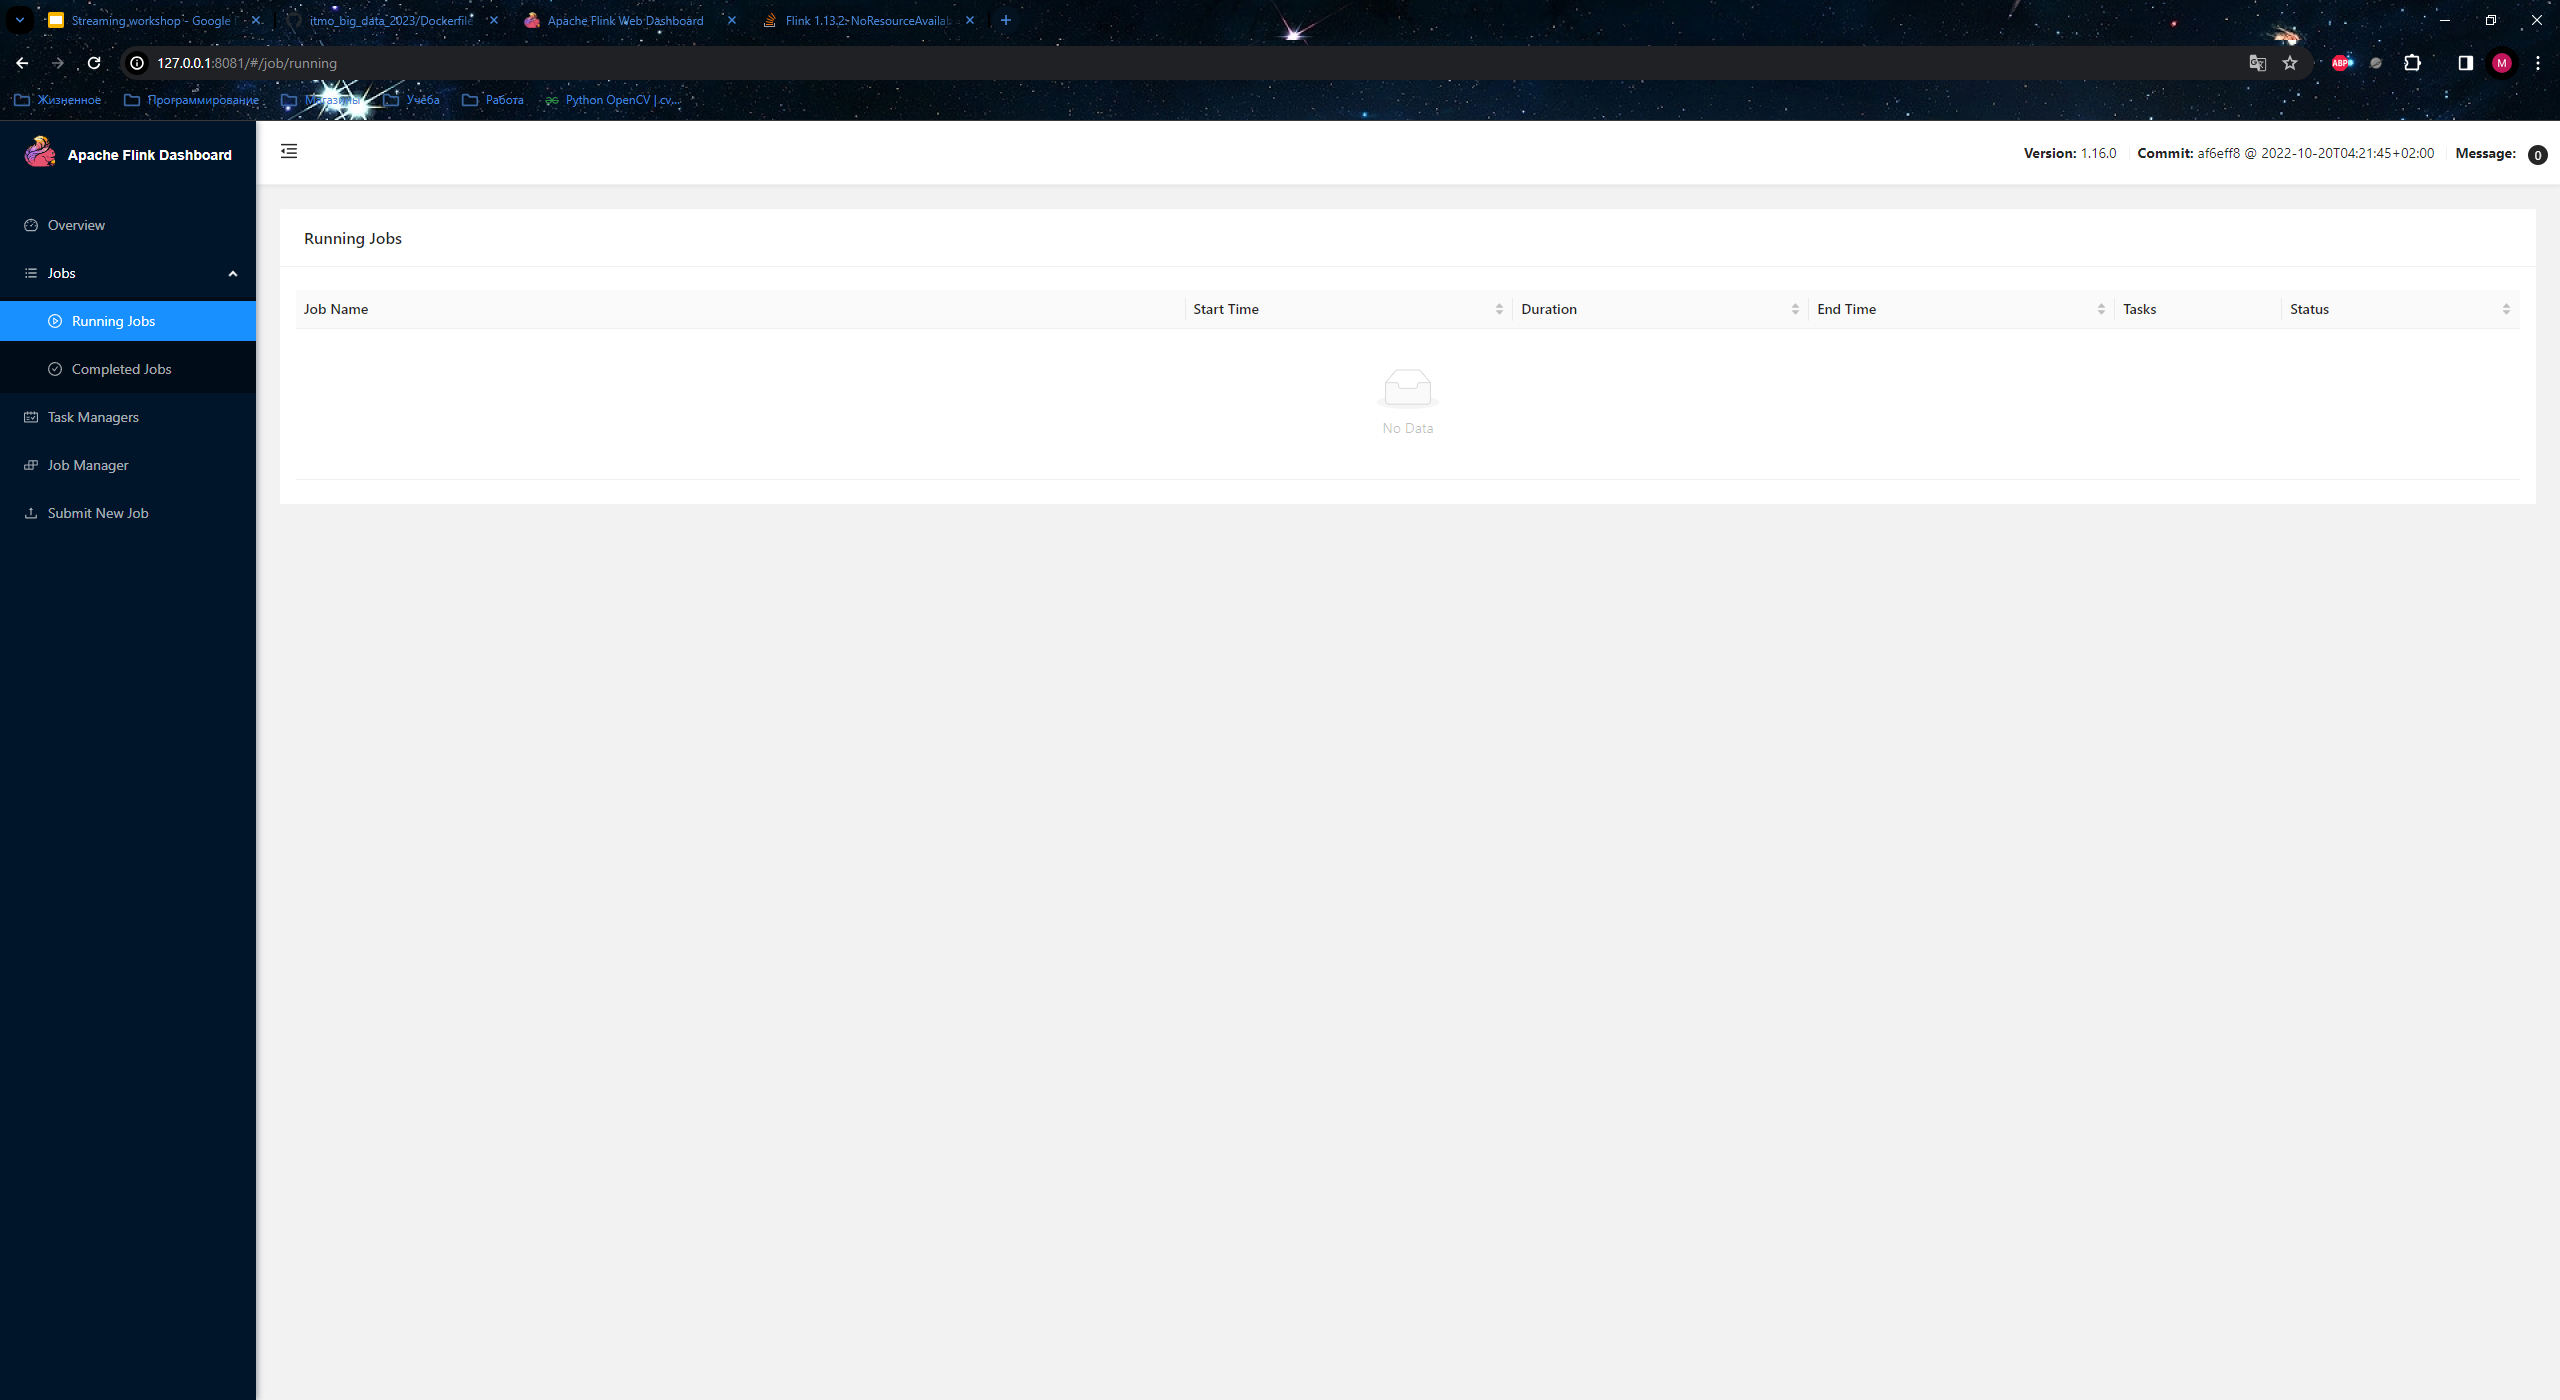

### Local save

In [ ]:
!chmod 777 ./tmp/

In [ ]:
!docker exec bigdata-docker-compose-jobmanager-1 ./bin/flink run -py /opt/pyflink/device_job_local_save.py  -d

In [ ]:
!cat ./device_job_local_save.py

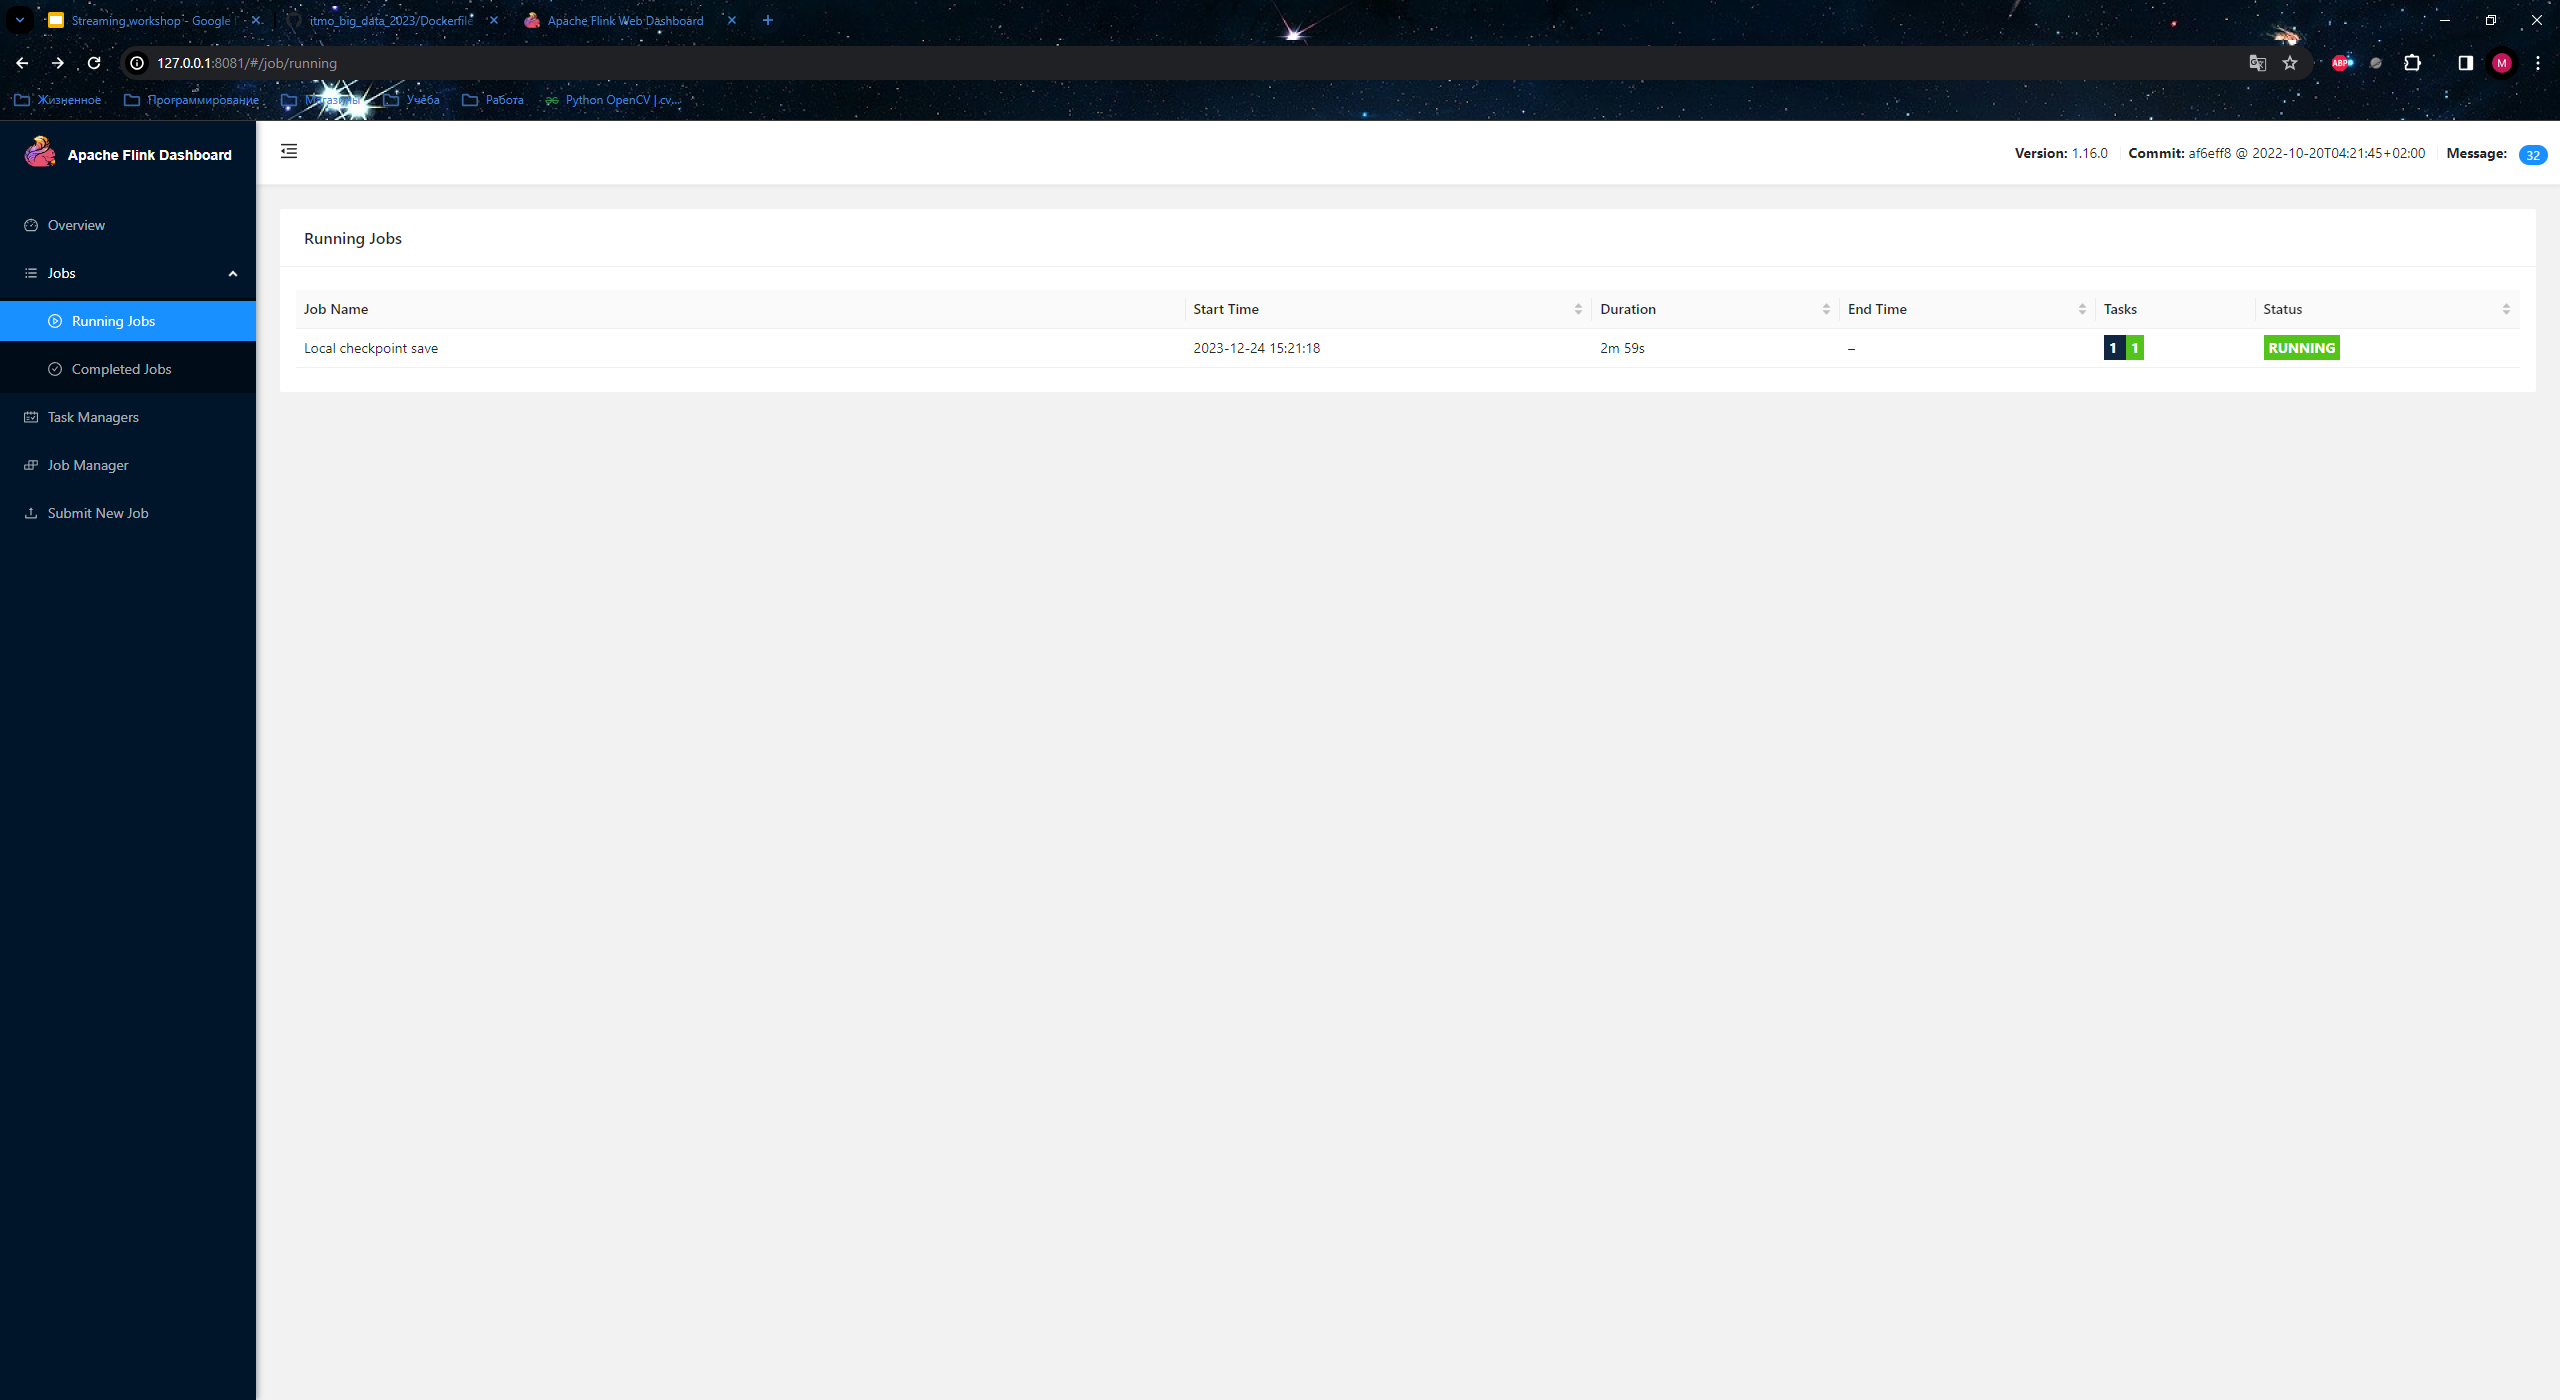
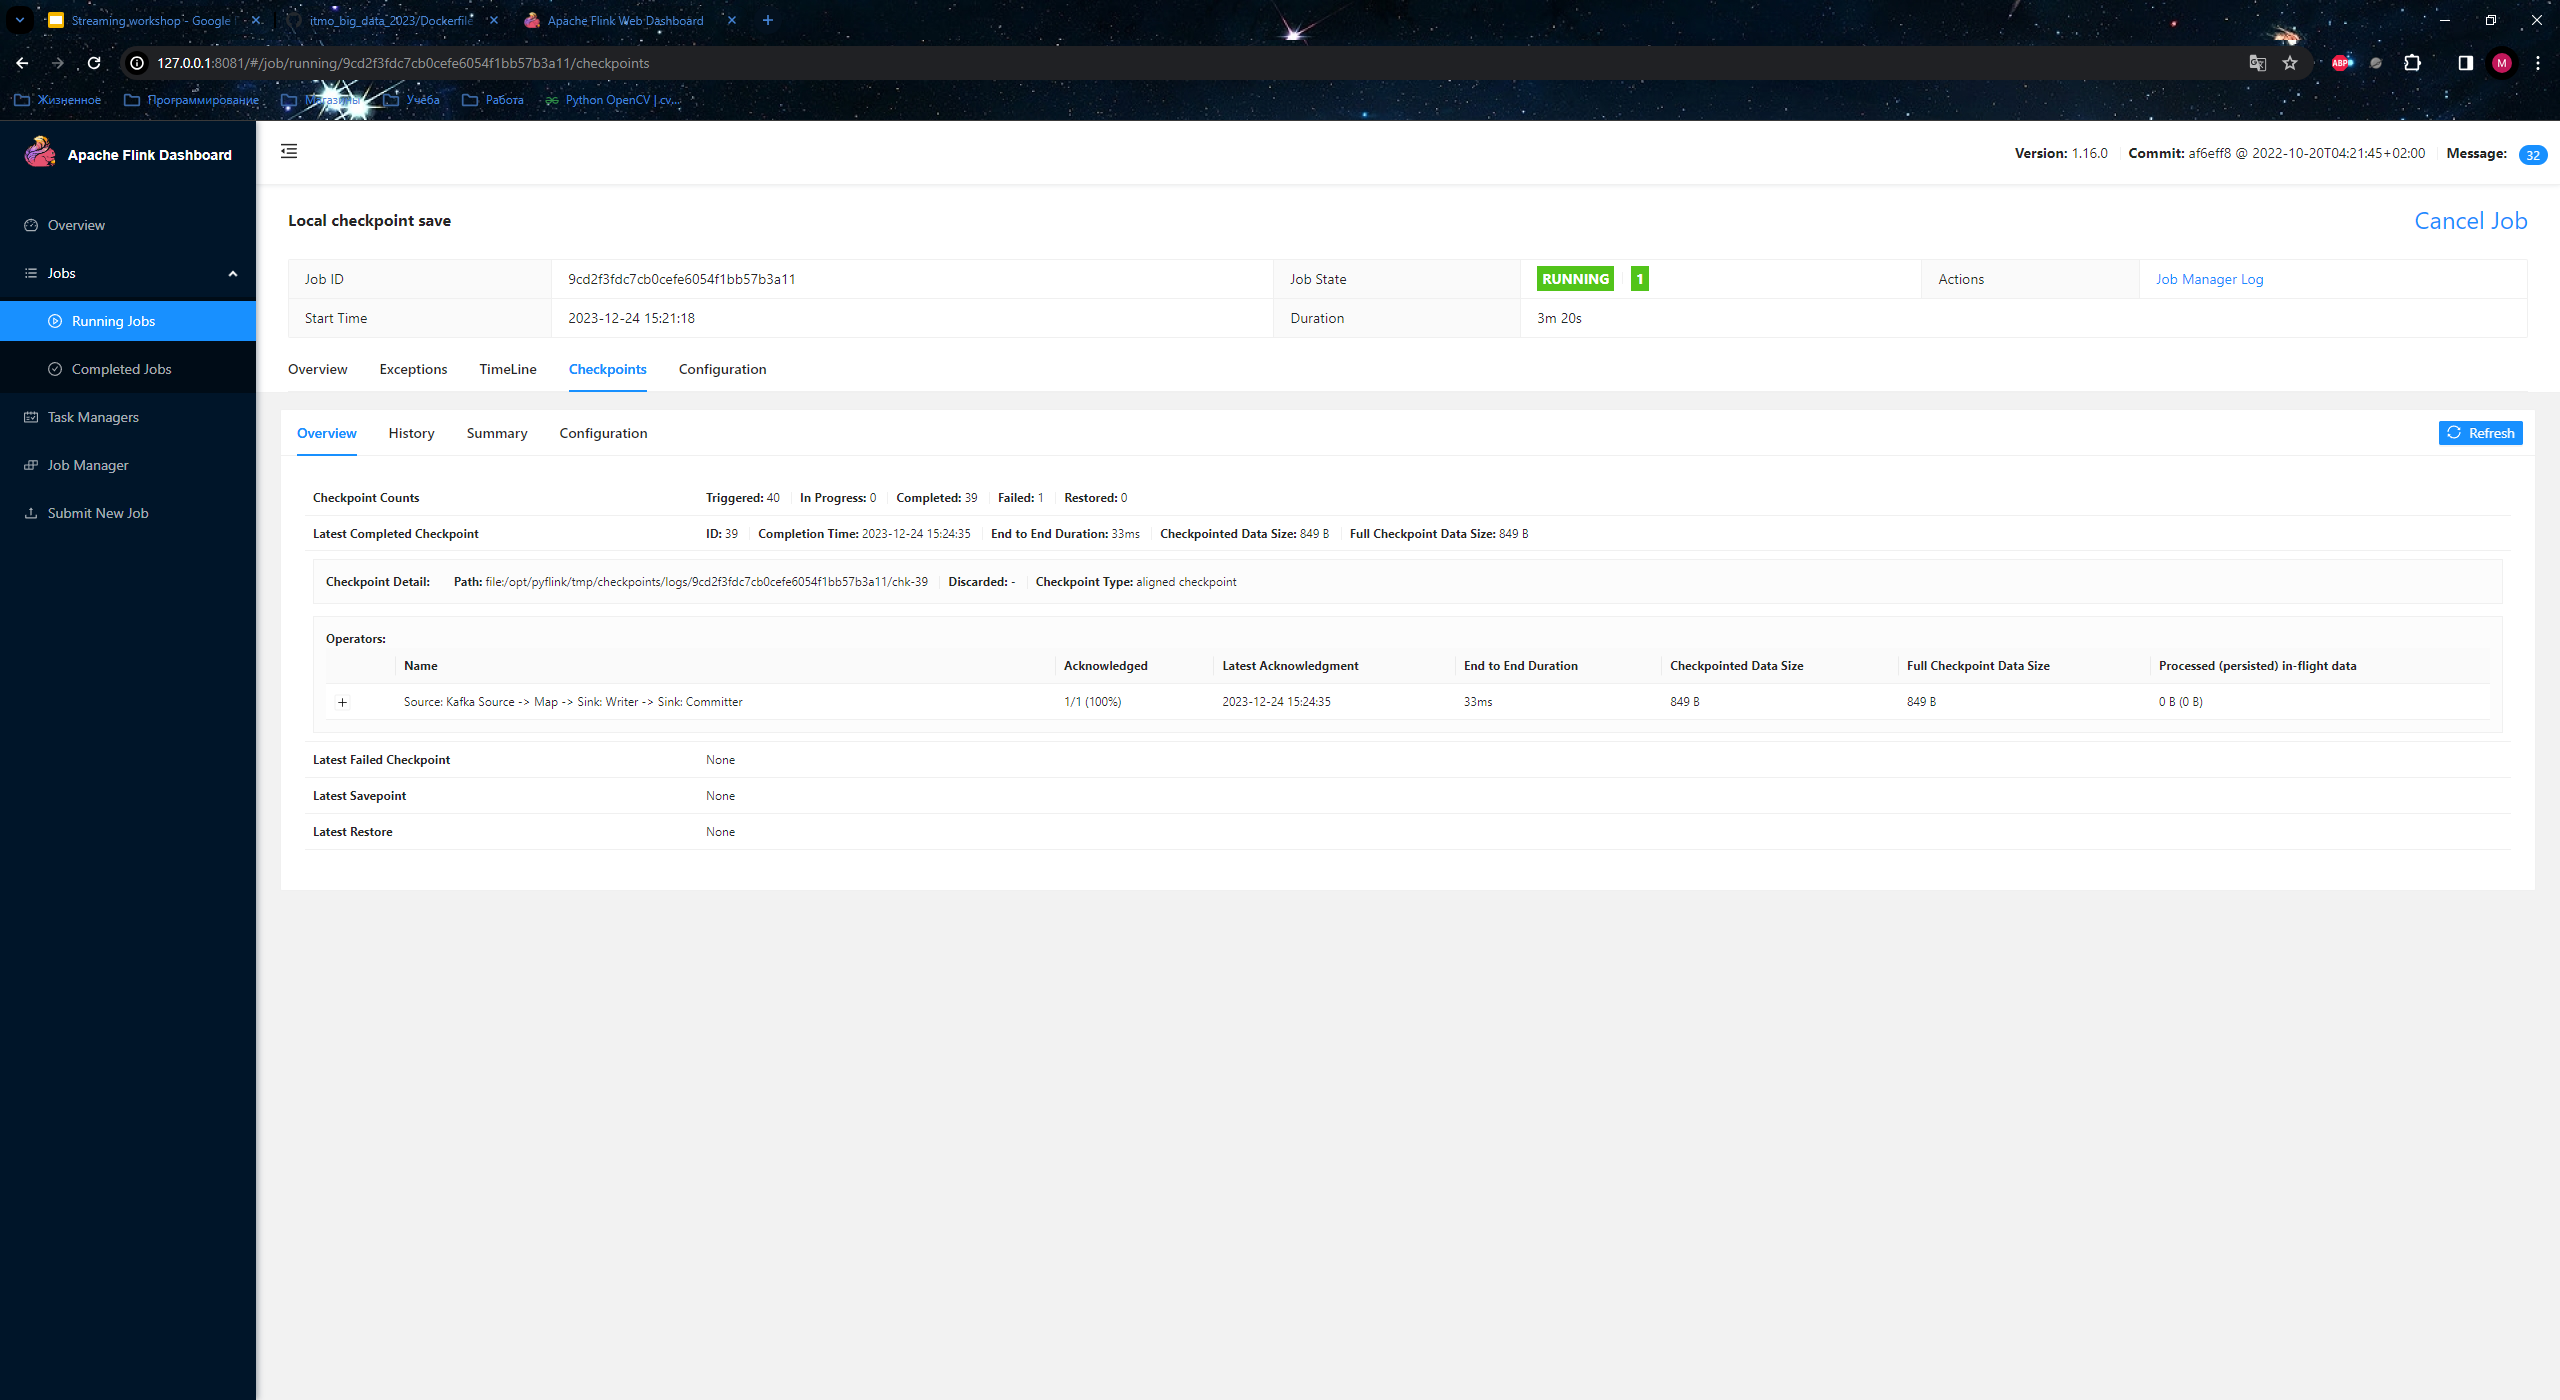
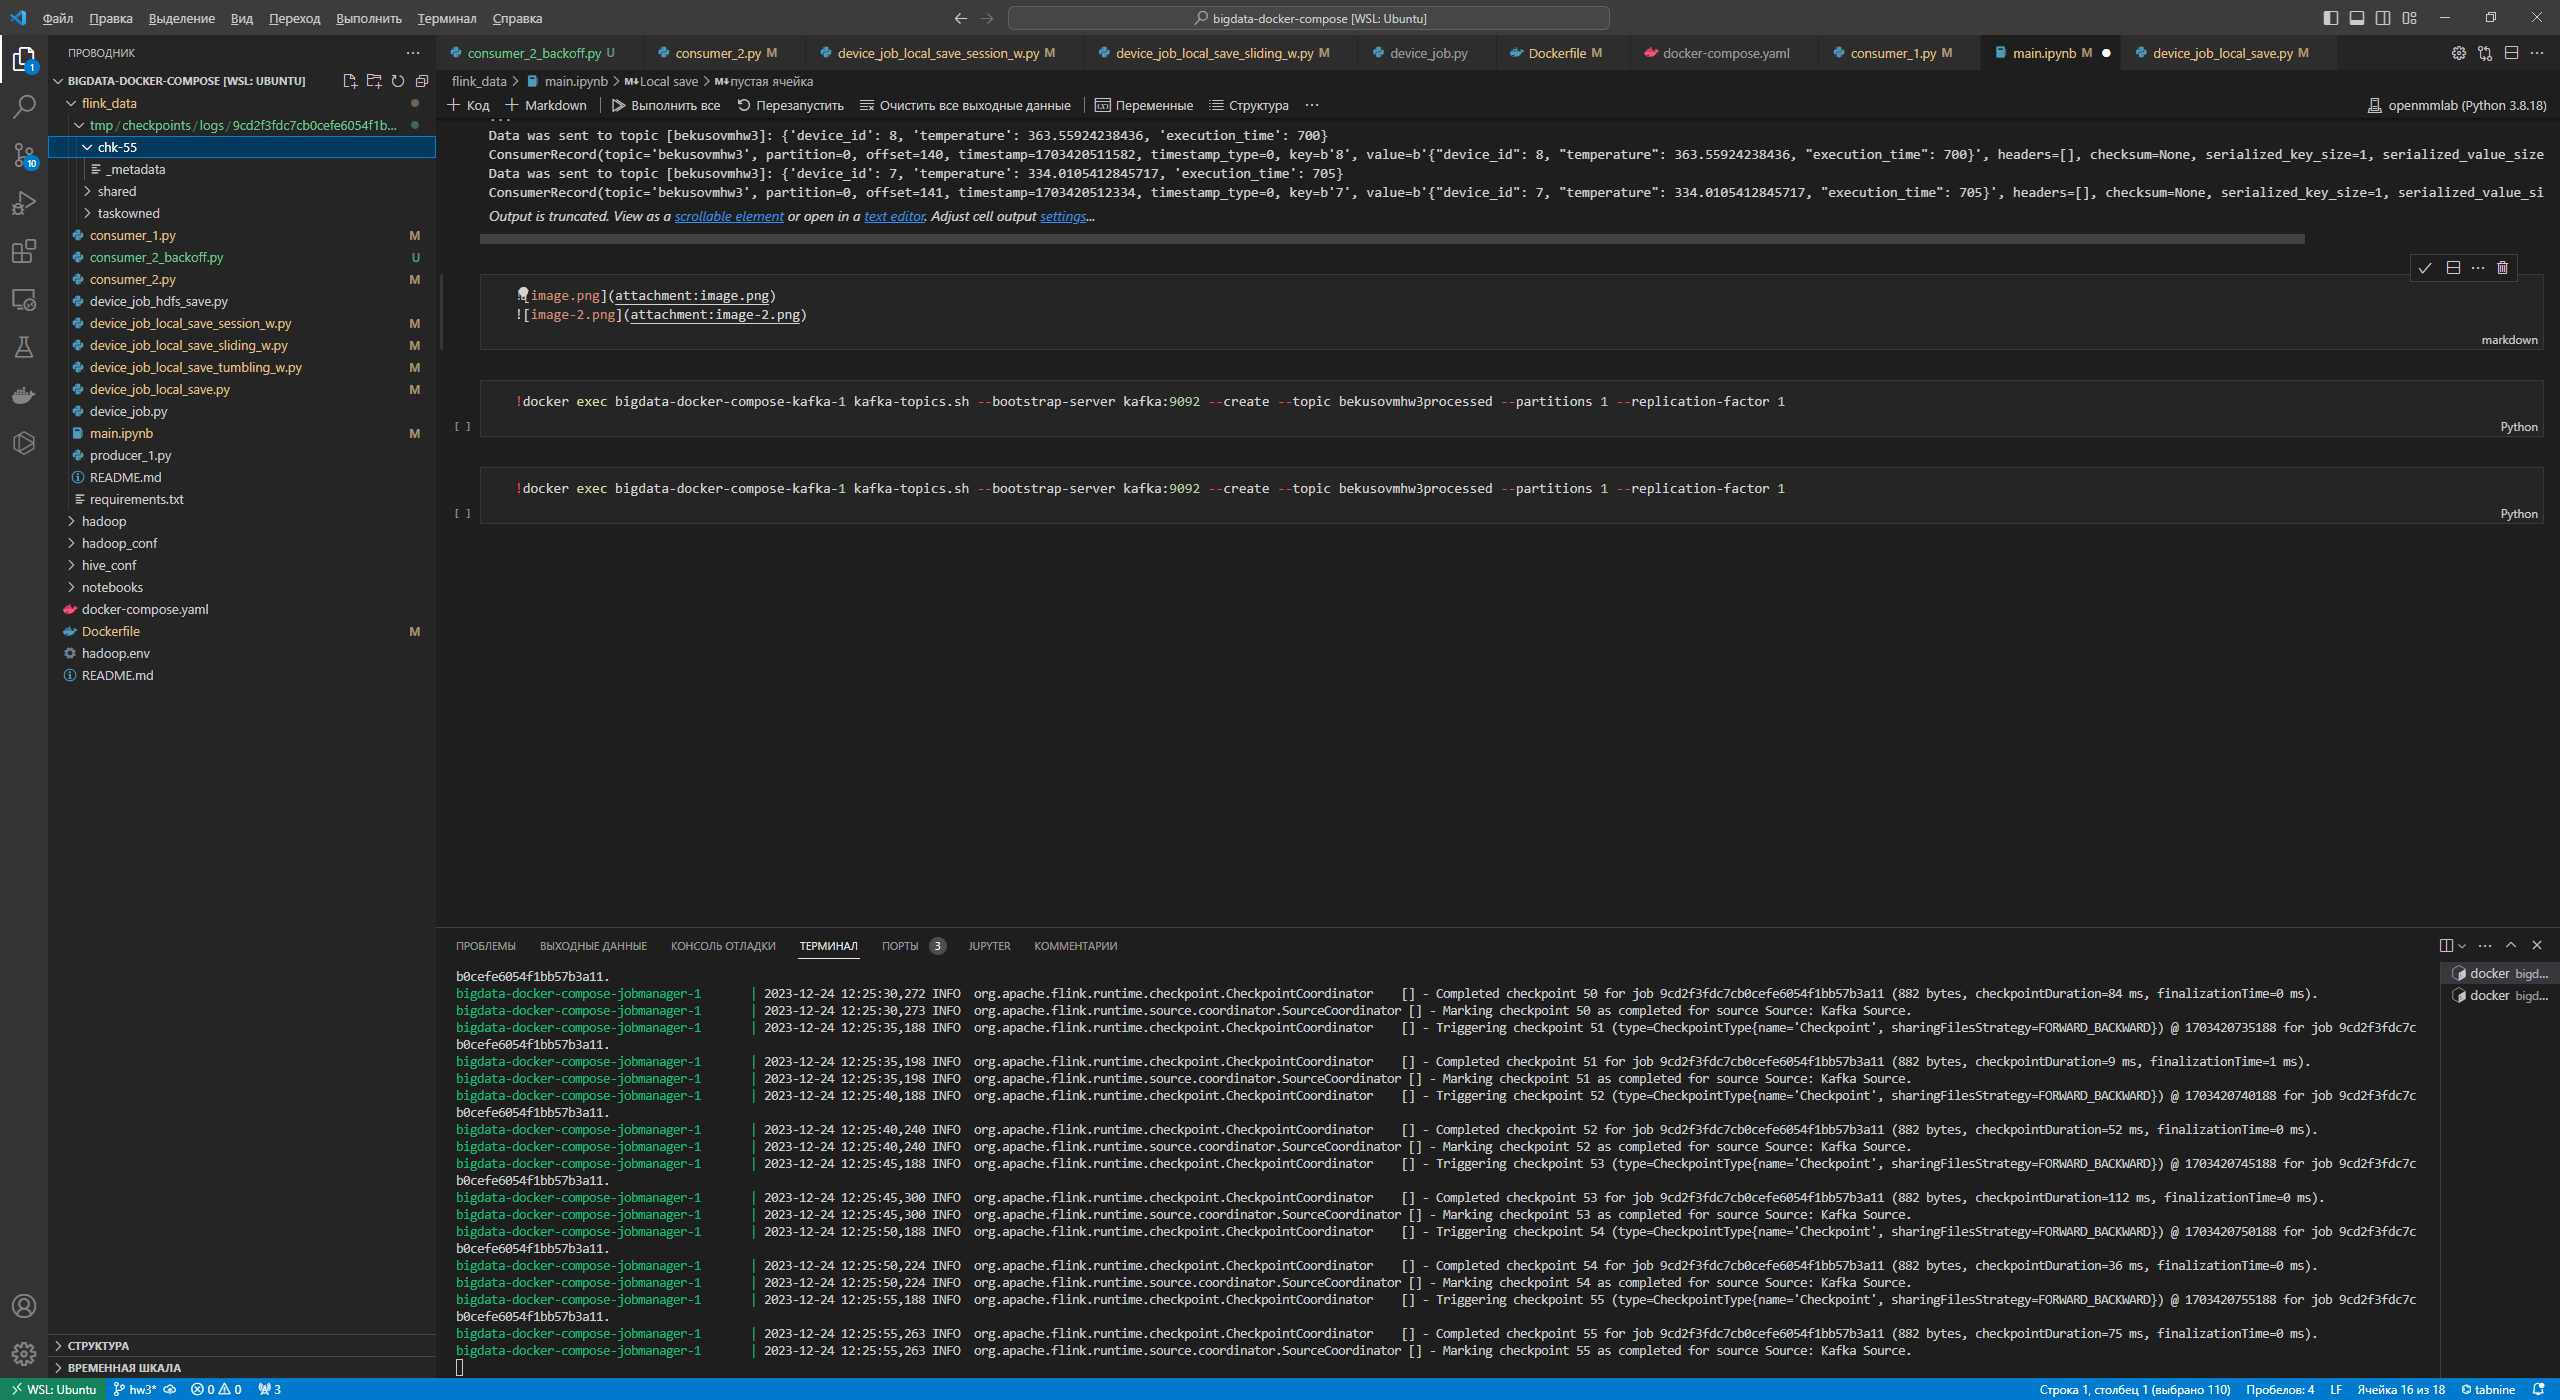

In [ ]:
subprocess.Popen(['python', 'consumer_2.py'])

ConsumerRecord(topic='bekusovmhw3processed', partition=0, offset=157, timestamp=1703450564801, timestamp_type=0, key=None, value=b"{'device_id': 1, 'temperature': 86.22338407713994, 'execution_time': 740}", headers=[], checksum=None, serialized_key_size=-1, serialized_value_size=73, serialized_header_size=-1)
ConsumerRecord(topic='bekusovmhw3processed', partition=0, offset=158, timestamp=1703450565552, timestamp_type=0, key=None, value=b"{'device_id': 8, 'temperature': 89.4318719365225, 'execution_time': 745}", headers=[], checksum=None, serialized_key_size=-1, serialized_value_size=72, serialized_header_size=-1)
ConsumerRecord(topic='bekusovmhw3processed', partition=0, offset=159, timestamp=1703450566303, timestamp_type=0, key=None, value=b"{'device_id': 6, 'temperature': 81.40990653217062, 'execution_time': 750}", headers=[], checksum=None, serialized_key_size=-1, serialized_value_size=73, serialized_header_size=-1)
ConsumerRecord(topic='bekusovmhw3processed', partition=0, offset=160

### HDFS checkpoint save

In [ ]:
!docker exec bigdata-docker-compose-jobmanager-1 ./bin/flink run -py /opt/pyflink/device_job_hdfs_save.py  -d

### Tumbling windows

In [4]:
!docker exec bigdata-docker-compose-jobmanager-1 ./bin/flink run -py /opt/pyflink/device_job_local_save_tumbling_w.py -d

Job has been submitted with JobID f209be00ce1d03e7a3c596e0ebb4dd34


In [5]:
!cat ./device_job_local_save_tumbling_w.py

from pyflink.common import SimpleStringSchema, Time
from pyflink.common.typeinfo import Types, RowTypeInfo
from pyflink.common.watermark_strategy import WatermarkStrategy
from pyflink.datastream import (
    StreamExecutionEnvironment,
    TimeCharacteristic,
    CheckpointConfig,
)

# from pyflink.datastream.checkpoint_config import CheckpointConfig
from pyflink.datastream.connectors import DeliveryGuarantee
from pyflink.datastream.connectors.kafka import (
    KafkaSource,
    KafkaOffsetsInitializer,
    KafkaSink,
    KafkaRecordSerializationSchema,
)
from pyflink.datastream.formats.json import JsonRowDeserializationSchema
from pyflink.datastream.functions import MapFunction, WindowFunction

from pyflink.datastream.window import TumblingProcessingTimeWindows


class MaxTemperatureFunction(WindowFunction):
    def apply(self, key, window, accumulator):
        max_temp = max(accumulator, key=lambda x: x["temperature"])
        yield str(max_temp["temperature"])


def python_data_str

In [10]:
subprocess.Popen(['python', 'consumer_tumbling.py'])

Connecting to Kafka brokers
{'bekusovmhw3processedtubling', 'bekusovmhw3processedsession', 'bekusovmhw3', 'bekusovmhw3processedsliding', 'bekusovmhw3processedtumbling', 'bekusovmhw3processed'}
ConsumerRecord(topic='bekusovmhw3processedtumbling', partition=0, offset=17, timestamp=1703450619999, timestamp_type=0, key=None, value=b'352.17551733642307', headers=[], checksum=None, serialized_key_size=-1, serialized_value_size=18, serialized_header_size=-1)
ConsumerRecord(topic='bekusovmhw3processedtumbling', partition=0, offset=18, timestamp=1703450619999, timestamp_type=0, key=None, value=b'351.25275014050317', headers=[], checksum=None, serialized_key_size=-1, serialized_value_size=18, serialized_header_size=-1)
ConsumerRecord(topic='bekusovmhw3processedtumbling', partition=0, offset=19, timestamp=1703450619999, timestamp_type=0, key=None, value=b'340.5584693016838', headers=[], checksum=None, serialized_key_size=-1, serialized_value_size=17, serialized_header_size=-1)
ConsumerRecord(topi

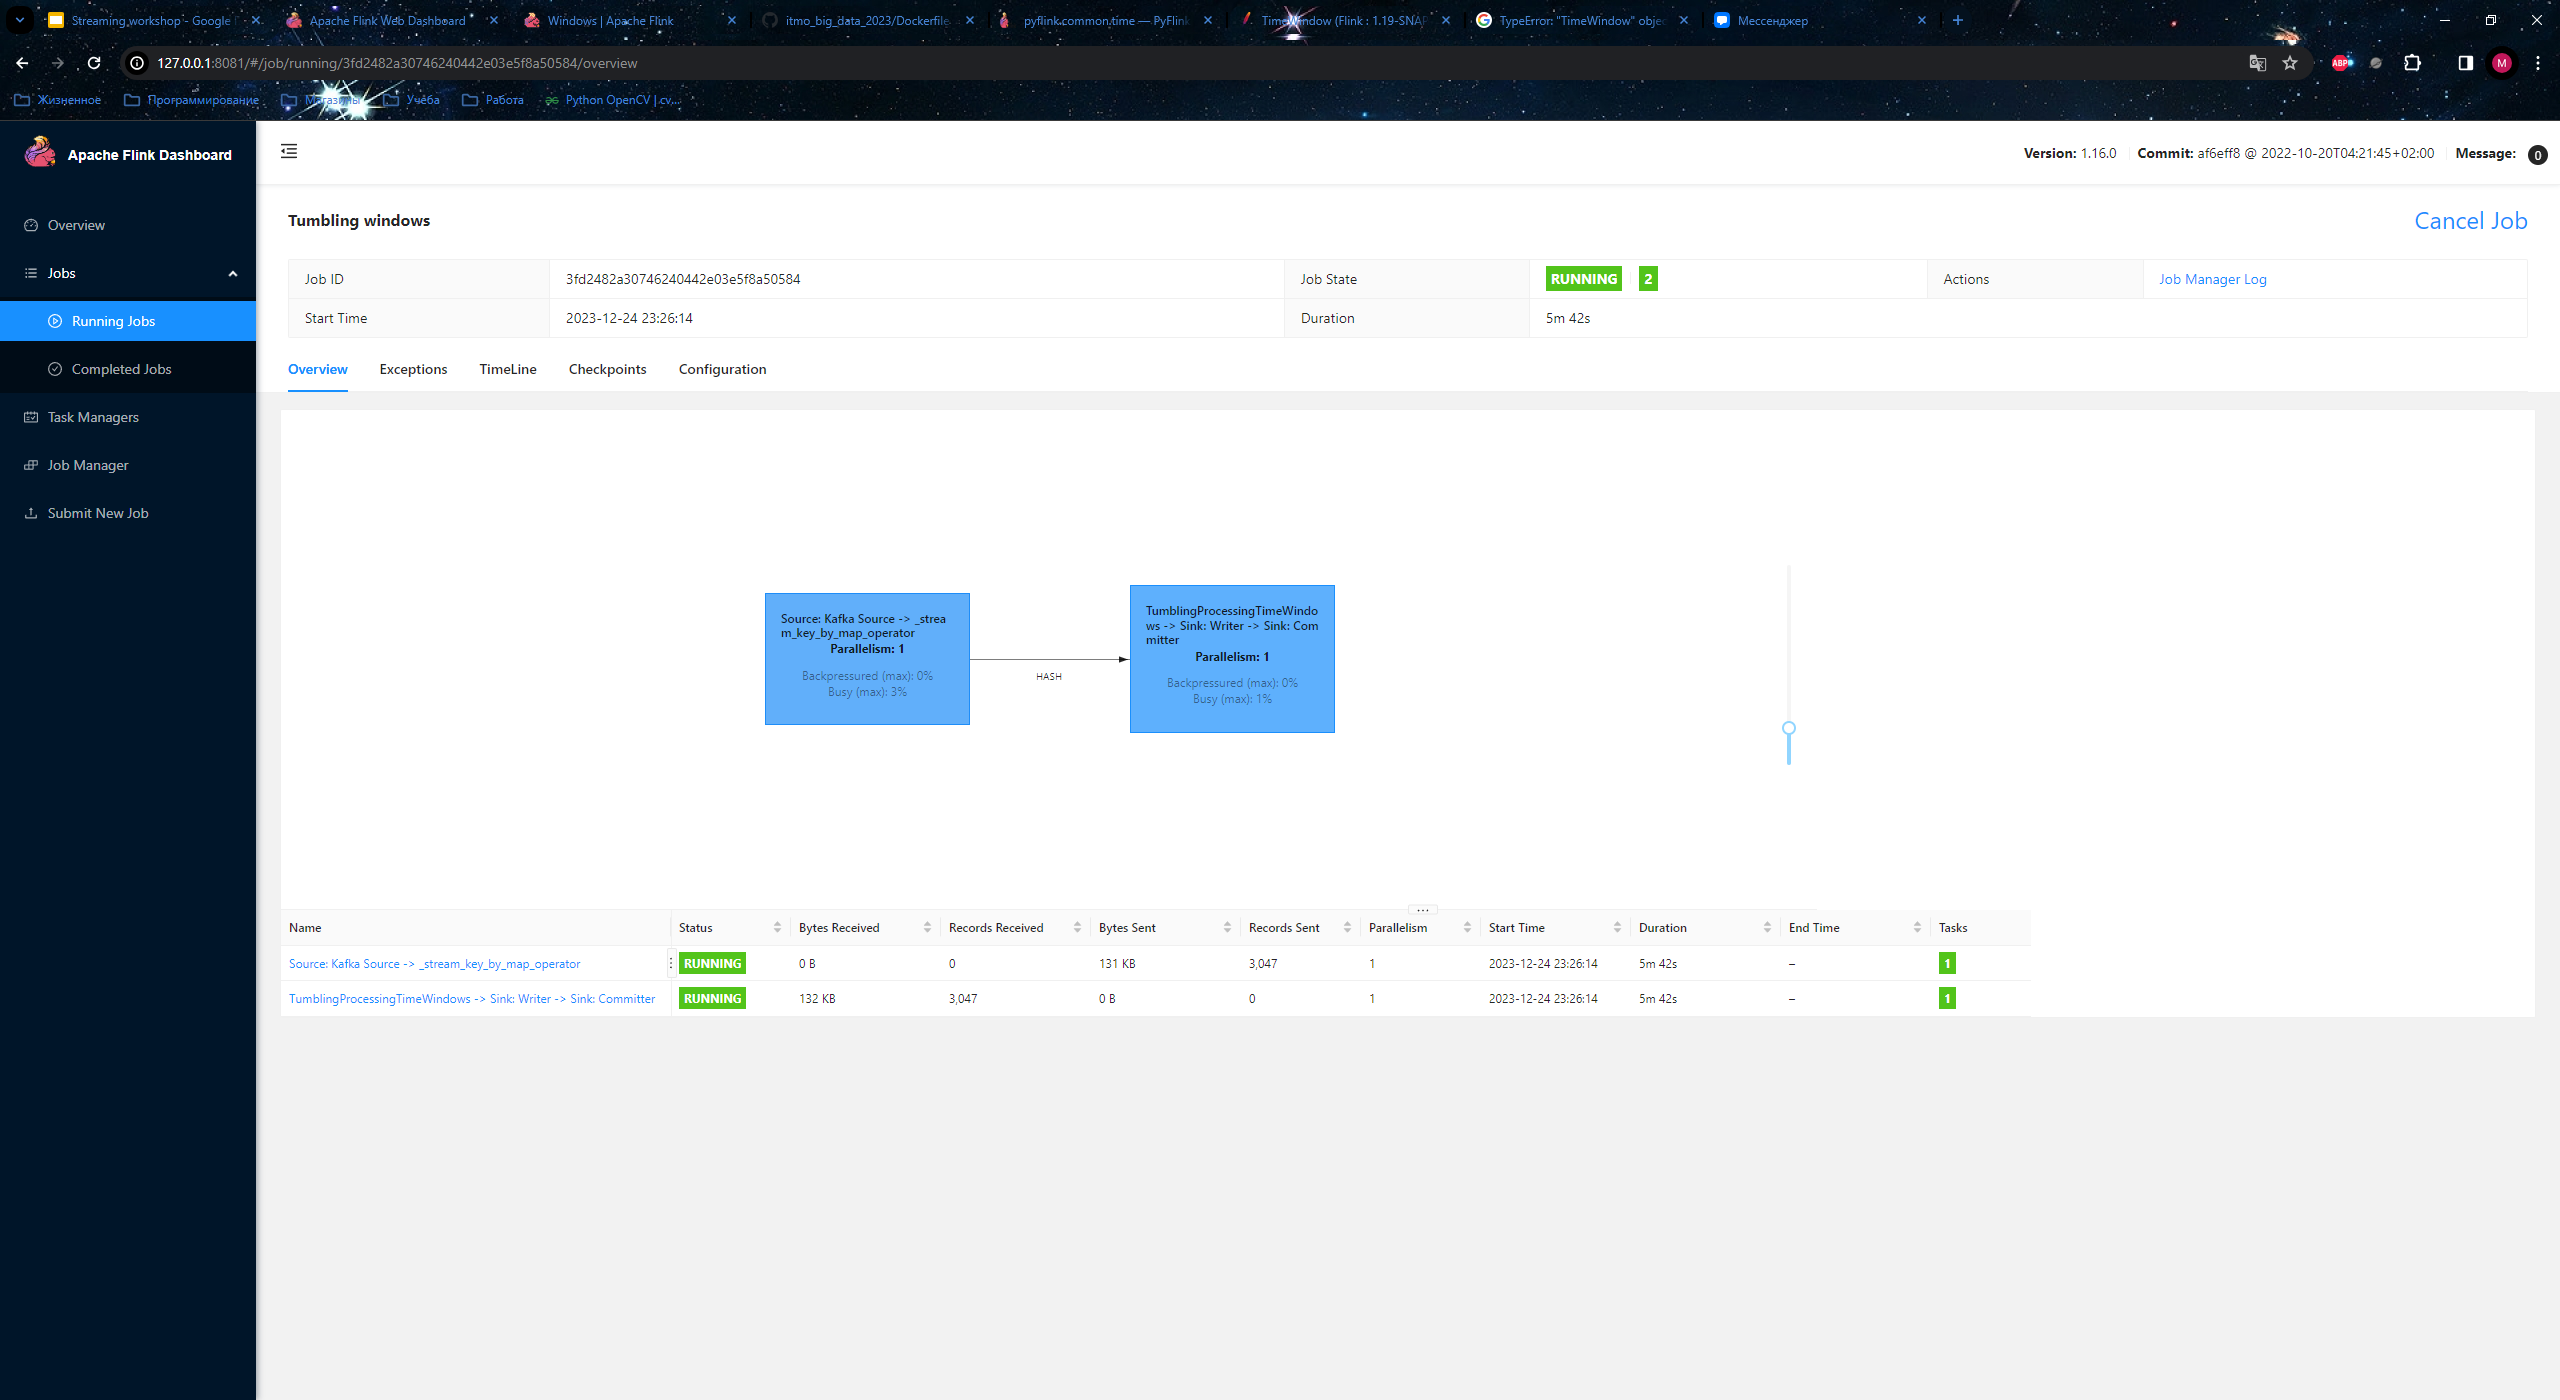

### Sliding windows

In [7]:
!docker exec bigdata-docker-compose-jobmanager-1 ./bin/flink run -py /opt/pyflink/device_job_local_save_sliding_w.py -d

ConsumerRecord(topic='bekusovmhw3processedtumbling', partition=0, offset=0, timestamp=1703450599999, timestamp_type=0, key=None, value=b'374.0065191998882', headers=[], checksum=None, serialized_key_size=-1, serialized_value_size=17, serialized_header_size=-1)
ConsumerRecord(topic='bekusovmhw3processedtumbling', partition=0, offset=1, timestamp=1703450599999, timestamp_type=0, key=None, value=b'380.08623531088017', headers=[], checksum=None, serialized_key_size=-1, serialized_value_size=18, serialized_header_size=-1)
ConsumerRecord(topic='bekusovmhw3processedtumbling', partition=0, offset=2, timestamp=1703450599999, timestamp_type=0, key=None, value=b'380.73111422429224', headers=[], checksum=None, serialized_key_size=-1, serialized_value_size=18, serialized_header_size=-1)
ConsumerRecord(topic='bekusovmhw3processedtumbling', partition=0, offset=3, timestamp=1703450599999, timestamp_type=0, key=None, value=b'382.7815938369166', headers=[], checksum=None, serialized_key_size=-1, seriali

In [11]:
!cat ./device_job_local_save_sliding_w.py

from pyflink.common import SimpleStringSchema, Time
from pyflink.common.typeinfo import Types, RowTypeInfo
from pyflink.common.watermark_strategy import WatermarkStrategy
from pyflink.datastream import (
    StreamExecutionEnvironment,
    TimeCharacteristic,
)

# from pyflink.datastream.checkpoint_config import CheckpointConfig
from pyflink.datastream.connectors import DeliveryGuarantee
from pyflink.datastream.connectors.kafka import (
    KafkaSource,
    KafkaOffsetsInitializer,
    KafkaSink,
    KafkaRecordSerializationSchema,
)

from pyflink.datastream.formats.json import JsonRowDeserializationSchema
from pyflink.datastream.functions import WindowFunction

from pyflink.datastream.window import SlidingProcessingTimeWindows


class MaxTemperatureFunction(WindowFunction):
    def apply(self, key, window, accumulator):
        max_temp = max(accumulator, key=lambda x: x["temperature"])
        yield str(max_temp["temperature"])


def python_data_stream_example():
    env = StreamExec

In [12]:
subprocess.Popen(['python', 'consumer_sliding.py'])

Connecting to Kafka brokers
{'bekusovmhw3processedtumbling', 'bekusovmhw3', 'bekusovmhw3processedsliding', 'bekusovmhw3processed', 'bekusovmhw3processedsession', 'bekusovmhw3processedtubling'}
ConsumerRecord(topic='bekusovmhw3processedsliding', partition=0, offset=0, timestamp=1703450609999, timestamp_type=0, key=None, value=b'374.0065191998882', headers=[], checksum=None, serialized_key_size=-1, serialized_value_size=17, serialized_header_size=-1)
ConsumerRecord(topic='bekusovmhw3processedsliding', partition=0, offset=1, timestamp=1703450609999, timestamp_type=0, key=None, value=b'382.81266833069367', headers=[], checksum=None, serialized_key_size=-1, serialized_value_size=18, serialized_header_size=-1)
ConsumerRecord(topic='bekusovmhw3processedsliding', partition=0, offset=2, timestamp=1703450609999, timestamp_type=0, key=None, value=b'379.7235912728884', headers=[], checksum=None, serialized_key_size=-1, serialized_value_size=17, serialized_header_size=-1)
ConsumerRecord(topic='beku

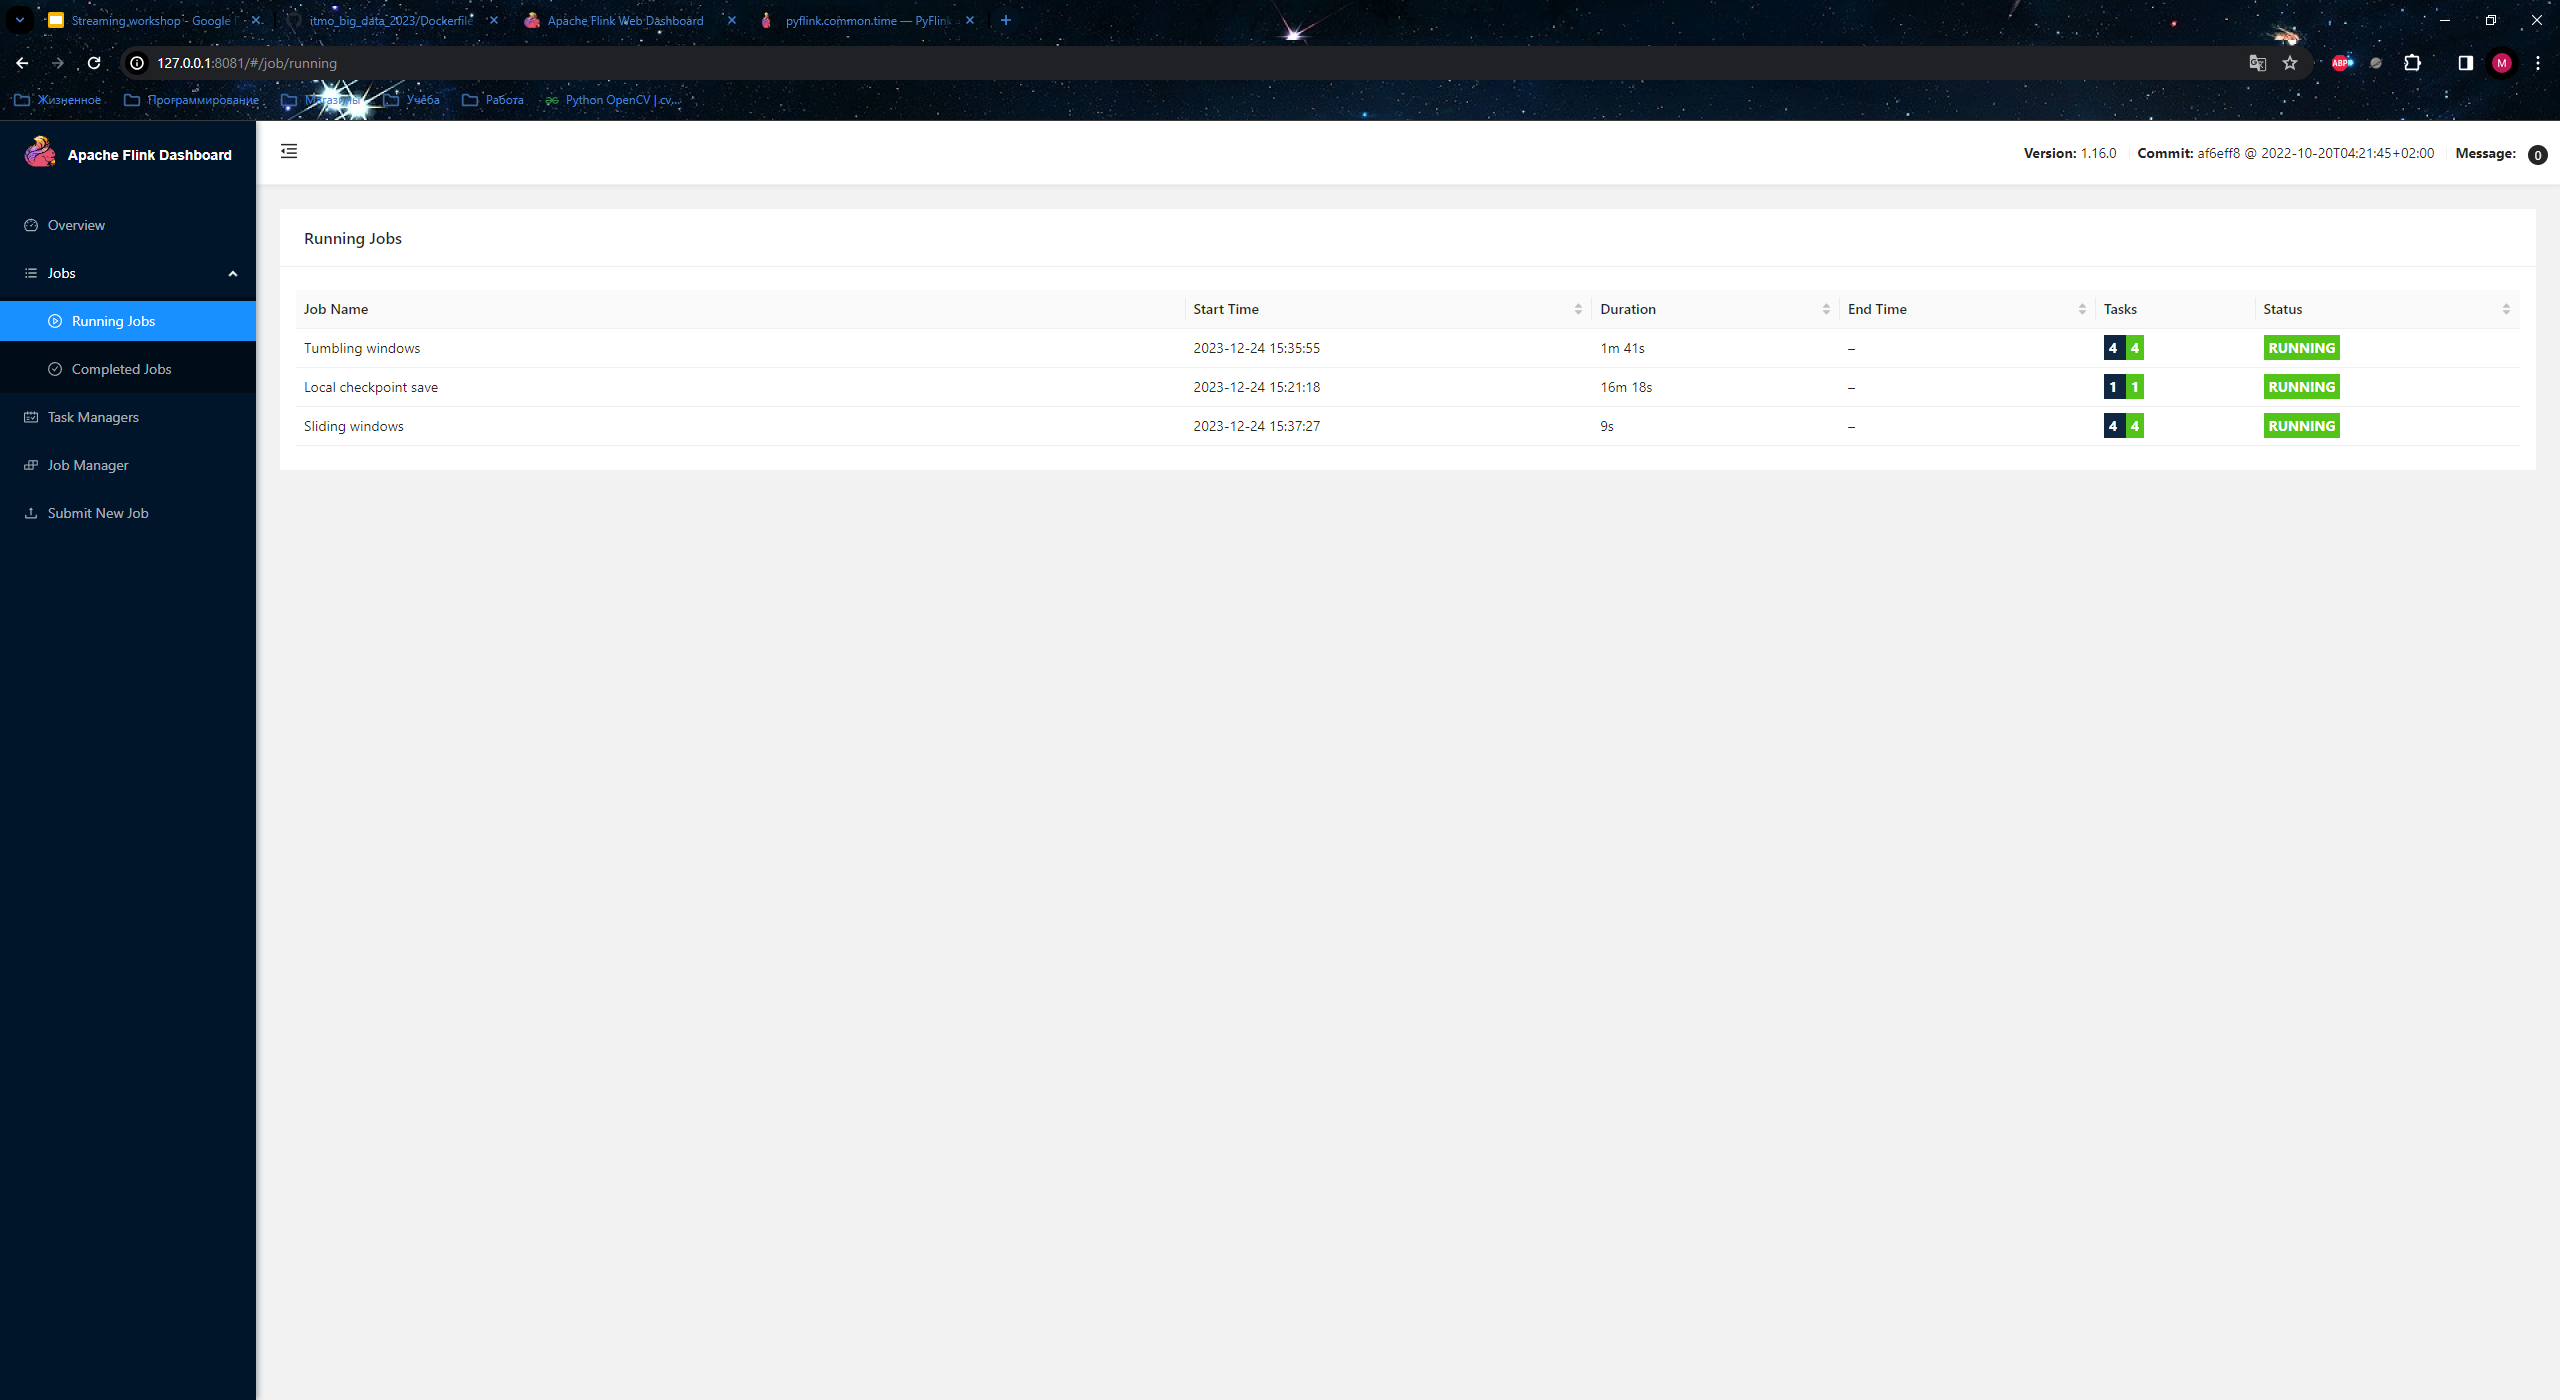

### Session windows

In [13]:
!docker exec bigdata-docker-compose-jobmanager-1 ./bin/flink run -py /opt/pyflink/device_job_local_save_session_w.py -d

ConsumerRecord(topic='bekusovmhw3processedtumbling', partition=0, offset=81, timestamp=1703450699999, timestamp_type=0, key=None, value=b'380.275216682591', headers=[], checksum=None, serialized_key_size=-1, serialized_value_size=16, serialized_header_size=-1)
ConsumerRecord(topic='bekusovmhw3processedtumbling', partition=0, offset=82, timestamp=1703450699999, timestamp_type=0, key=None, value=b'355.44724706580814', headers=[], checksum=None, serialized_key_size=-1, serialized_value_size=18, serialized_header_size=-1)
ConsumerRecord(topic='bekusovmhw3processedtumbling', partition=0, offset=83, timestamp=1703450699999, timestamp_type=0, key=None, value=b'373.47027818888904', headers=[], checksum=None, serialized_key_size=-1, serialized_value_size=18, serialized_header_size=-1)
ConsumerRecord(topic='bekusovmhw3processedtumbling', partition=0, offset=84, timestamp=1703450699999, timestamp_type=0, key=None, value=b'340.57913581113553', headers=[], checksum=None, serialized_key_size=-1, ser

In [14]:
!cat ./device_job_local_save_session_w.py

from pyflink.common import SimpleStringSchema, Time
from pyflink.common.typeinfo import Types, RowTypeInfo
from pyflink.common.watermark_strategy import WatermarkStrategy
from pyflink.datastream import (
    StreamExecutionEnvironment,
    TimeCharacteristic,
)

from pyflink.datastream.connectors import DeliveryGuarantee
from pyflink.datastream.connectors.kafka import (
    KafkaSource,
    KafkaOffsetsInitializer,
    KafkaSink,
    KafkaRecordSerializationSchema,
)
from pyflink.datastream.formats.json import JsonRowDeserializationSchema

from pyflink.datastream.window import (
    EventTimeSessionWindows,
)

from pyflink.datastream.functions import WindowFunction

class MaxTemperatureFunction(WindowFunction):
    def apply(self, key, window, accumulator):
        max_temp = max(accumulator, key=lambda x: x["temperature"])
        yield str(max_temp["temperature"])


def python_data_stream_example():
    env = StreamExecutionEnvironment.get_execution_environment()
    env.set_parallel

In [15]:
subprocess.Popen(['python', 'consumer_session.py'])

Connecting to Kafka brokers
{'bekusovmhw3processedtubling', 'bekusovmhw3processed', 'bekusovmhw3processedsession', 'bekusovmhw3processedsliding', 'bekusovmhw3processedtumbling', 'bekusovmhw3'}
ConsumerRecord(topic='bekusovmhw3processedsliding', partition=0, offset=95, timestamp=1703450709999, timestamp_type=0, key=None, value=b'361.7980274662089', headers=[], checksum=None, serialized_key_size=-1, serialized_value_size=17, serialized_header_size=-1)
ConsumerRecord(topic='bekusovmhw3processedsliding', partition=0, offset=96, timestamp=1703450709999, timestamp_type=0, key=None, value=b'343.7810502034537', headers=[], checksum=None, serialized_key_size=-1, serialized_value_size=17, serialized_header_size=-1)
ConsumerRecord(topic='bekusovmhw3processedsliding', partition=0, offset=97, timestamp=1703450709999, timestamp_type=0, key=None, value=b'371.8062222467547', headers=[], checksum=None, serialized_key_size=-1, serialized_value_size=17, serialized_header_size=-1)
ConsumerRecord(topic='be

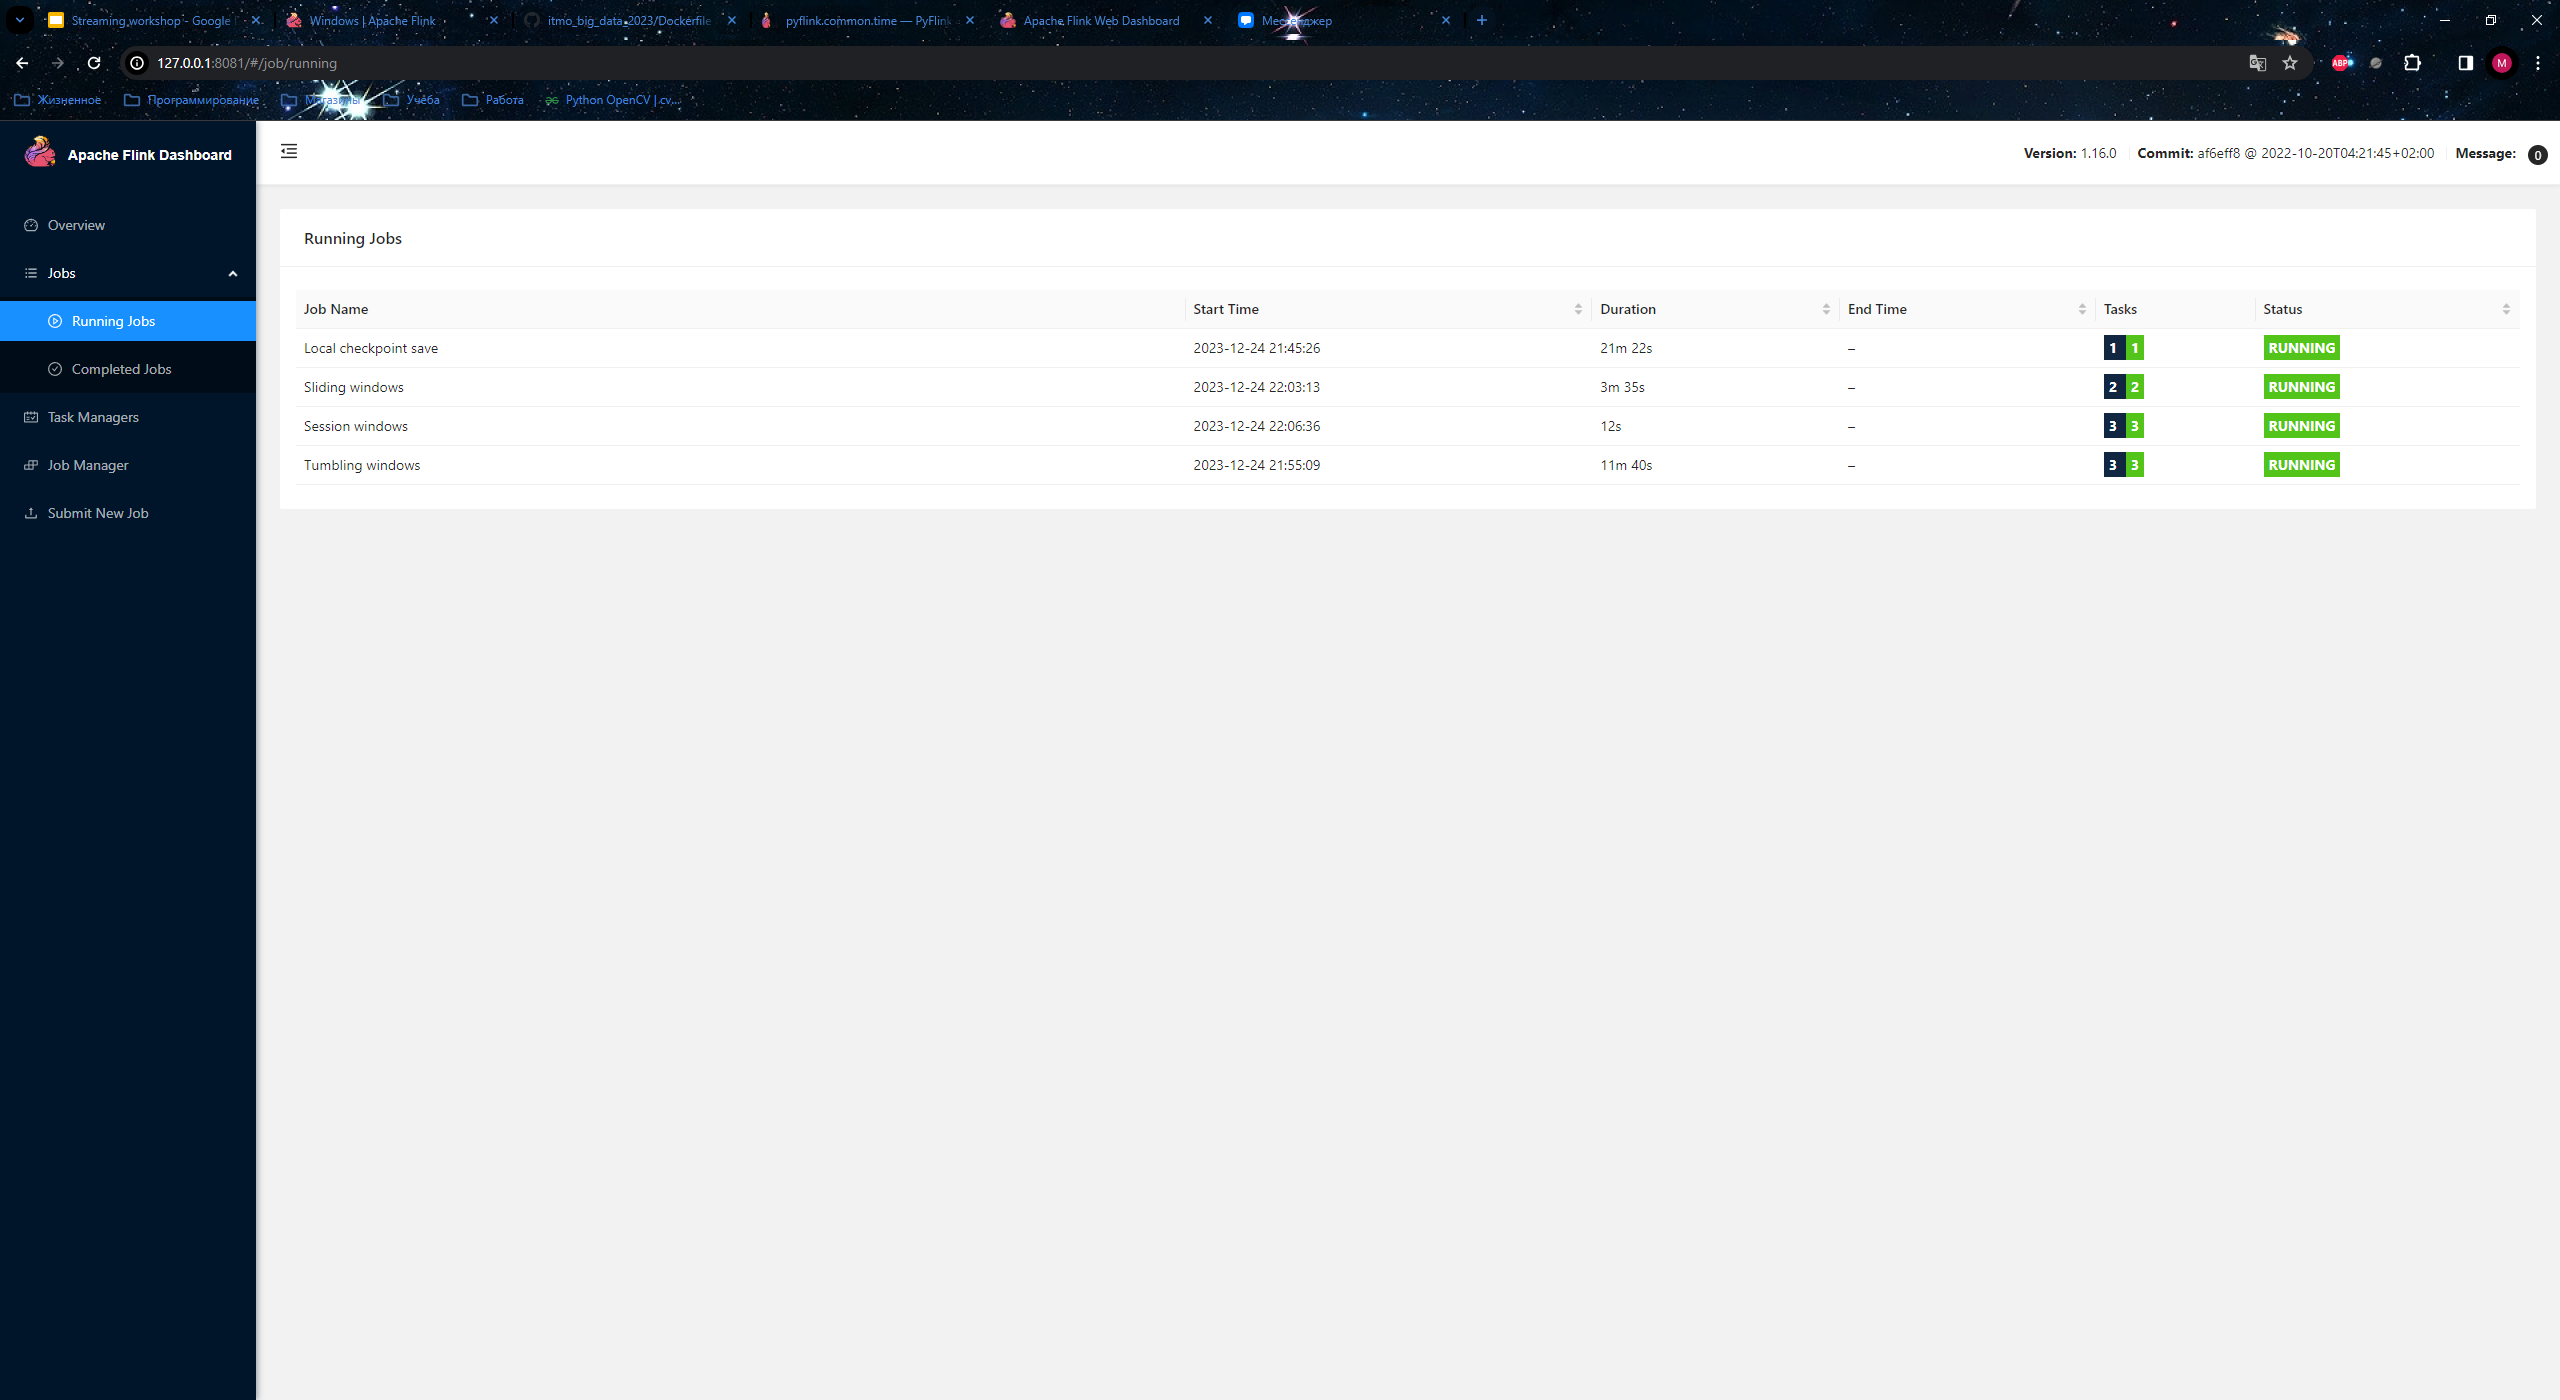

### Backoff

In [6]:
subprocess.Popen(['python', 'consumer_2_backoff.py'])

Connecting to Kafka brokers
retry
ConsumerRecord(topic='bekusovmhw3', partition=0, offset=1296, timestamp=1703537511398, timestamp_type=0, key=b'6', value=b'{"device_id": 6, "temperature": 374.07643434983504, "execution_time": 700}', headers=[], checksum=None, serialized_key_size=1, serialized_value_size=74, serialized_header_size=-1)
retry
retry
ConsumerRecord(topic='bekusovmhw3', partition=0, offset=1297, timestamp=1703537512149, timestamp_type=0, key=b'7', value=b'{"device_id": 7, "temperature": 336.33278088768424, "execution_time": 705}', headers=[], checksum=None, serialized_key_size=1, serialized_value_size=74, serialized_header_size=-1)
retry
ConsumerRecord(topic='bekusovmhw3', partition=0, offset=1298, timestamp=1703537512900, timestamp_type=0, key=b'4', value=b'{"device_id": 4, "temperature": 339.57077638644466, "execution_time": 710}', headers=[], checksum=None, serialized_key_size=1, serialized_value_size=74, serialized_header_size=-1)
retry
ConsumerRecord(topic='bekusovmhw3

In [5]:
!cat ./consumer_2_backoff.py

from kafka import KafkaConsumer
import time
import random


def backoff(tries, sleep):
    def decorator(func):
        def wrapper(*args, **kwargs):
            for i in range(tries):
                try:
                    return func(*args, **kwargs)
                except Exception as e:
                    if i < tries - 1:
                        time.sleep(sleep)
                    else:
                        raise e
        return wrapper
    return decorator


@backoff(tries=10, sleep=7)
def message_handler(value):
    if random.random()<0.5:
        print("retry")
        raise Exception
    print(value)


def create_consumer():
    print("Connecting to Kafka brokers")
    consumer = KafkaConsumer(
        "bekusovmhw3",
        group_id="itmo_group1",
        bootstrap_servers="localhost:29092",
        auto_offset_reset="earliest",
        enable_auto_commit=True,
    )

    for message in consumer:
        message_handler(message)


if __name__ == "__main__":
    creat